# Figure 6

Script to generate Figure 6 from [1]. This figure shows the regression results for the Localized Strain Reconstruction machine learning model, found here: `../../ML/StrainReconstruction/`.

> [1] Brett C. Hannigan, Tyler J. Cuthbert, Chakaveh Ahmadizadeh, and Carlo Menon. Distributed Sensing Along Fibres for Smart Clothing. *Science Advances*. 2023 (In Review).

©2023 ETH Zurich, Brett Hannigan; D-HEST; Biomedical and Mobile Health Technology (BMHT) Lab; Carlo Menon

In [2]:
library(ggplot2)
library(cowplot)
library(tidyverse)
library(ggh4x)

## Import Regression Data

In [3]:
df <- read.csv('../../ML/StrainReconstruction/20230127T161506_StrainPrediction.csv')
df$is_multi <- as.logical(df$is_multi)
df$is_train <- as.logical(df$is_train)
df$is_val <- as.logical(df$is_val)
df$is_test <- as.logical(df$is_test)
df <- subset(df, is_test)
df['total_time'] = (df$X - df$X[1])*1/100
colnames(df)[colnames(df)=='sensor'] <- 'strained_sensor' 
head(df)

,X,trial,strained_sensor,time,strain,I_12451,I_24902,I_49805,I_99609,Q_12451,⋯,strain_D,strain_A_pred,strain_B_pred,strain_C_pred,strain_D_pred,is_multi,is_train,is_val,is_test,total_time
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>
442234,442233,5,A,0.00,0.000000e+00,53.12446,43.10482,-1.6233811,2.1886358,1.8278959,⋯,0,0,0.0004711300,-0.0006680489,0,FALSE,FALSE,FALSE,TRUE,0.00
442235,442234,5,A,0.01,-3.107576e-08,55.75907,44.31766,-1.2226243,-0.9441736,2.8291959,⋯,0,0,0.0007622838,-0.0006710291,0,FALSE,FALSE,FALSE,TRUE,0.01
442236,442235,5,A,0.02,-1.171756e-07,56.95794,43.09851,-0.5546963,-1.7708476,0.7559159,⋯,0,0,0.0010543466,-0.0006787479,0,FALSE,FALSE,FALSE,TRUE,0.02
442237,442236,5,A,0.03,-5.930054e-08,58.15785,41.87831,0.1132317,-2.5975216,-1.3055841,⋯,0,0,0.0013462156,-0.0006882474,0,FALSE,FALSE,FALSE,TRUE,0.03
442238,442237,5,A,0.04,-3.136086e-08,65.41520,37.16159,3.4229301,-5.3426494,-7.0071041,⋯,0,0,0.0015050769,-0.0007022247,0,FALSE,FALSE,FALSE,TRUE,0.04
442239,442238,5,A,0.05,-4.846679e-09,81.39978,27.40627,10.5375149,-10.8500086,-17.9271641,⋯,0,0,0.0015076548,-0.0007205978,0,FALSE,FALSE,FALSE,TRUE,0.05


In [4]:
df_long <- df %>% 
        pivot_longer(c("strain_A", "strain_B", "strain_C", "strain_D"), values_to="strain_actual", names_to='sensor', names_pattern="^(?:strain_)([A-D])(?:_pred)?$")
df_strain_pred <- df %>%
        pivot_longer(c("strain_A_pred", "strain_B_pred", "strain_C_pred", "strain_D_pred"), values_to="strain_pred", names_to='sensor', names_pattern="^(?:strain_)([A-D])(?:_pred)?$")
df_long$strain_pred <- df_strain_pred$strain_pred
df_long <- select(df_long, -c("strain_A_pred", "strain_B_pred", "strain_C_pred", "strain_D_pred"))
head(df_long)

X,trial,strained_sensor,time,strain,I_12451,I_24902,I_49805,I_99609,Q_12451,⋯,Q_49805,Q_99609,is_multi,is_train,is_val,is_test,total_time,sensor,strain_actual,strain_pred
<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>
442233,5,A,0.00,0.000000e+00,53.12446,43.10482,-1.623381,2.1886358,1.827896,⋯,-1.733349,-3.464024,FALSE,FALSE,FALSE,TRUE,0.00,A,0.000000e+00,0.0000000000
442233,5,A,0.00,0.000000e+00,53.12446,43.10482,-1.623381,2.1886358,1.827896,⋯,-1.733349,-3.464024,FALSE,FALSE,FALSE,TRUE,0.00,B,0.000000e+00,0.0004711300
442233,5,A,0.00,0.000000e+00,53.12446,43.10482,-1.623381,2.1886358,1.827896,⋯,-1.733349,-3.464024,FALSE,FALSE,FALSE,TRUE,0.00,C,0.000000e+00,-0.0006680489
442233,5,A,0.00,0.000000e+00,53.12446,43.10482,-1.623381,2.1886358,1.827896,⋯,-1.733349,-3.464024,FALSE,FALSE,FALSE,TRUE,0.00,D,0.000000e+00,0.0000000000
442234,5,A,0.01,-3.107576e-08,55.75907,44.31766,-1.222624,-0.9441736,2.829196,⋯,-1.100964,-11.855528,FALSE,FALSE,FALSE,TRUE,0.01,A,-3.107576e-08,0.0000000000
442234,5,A,0.01,-3.107576e-08,55.75907,44.31766,-1.222624,-0.9441736,2.829196,⋯,-1.100964,-11.855528,FALSE,FALSE,FALSE,TRUE,0.01,B,0.000000e+00,0.0007622838


## Generate Time Series Plot

This plot will be the lower left part of Figure 6.

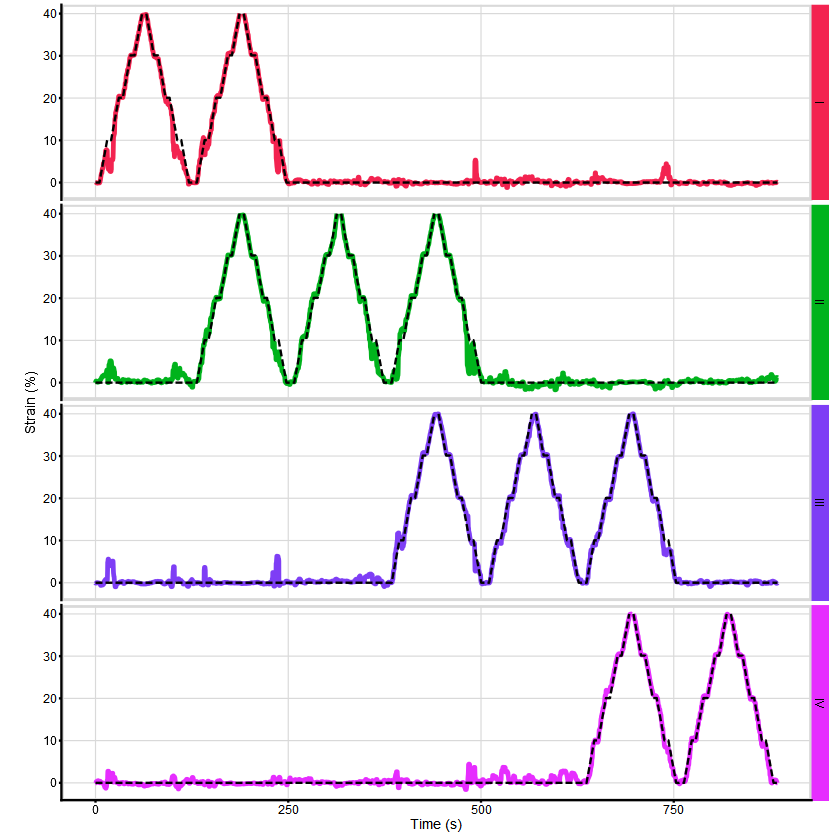

In [5]:
colour_list = c('#F32350', '#00B31C', '#7E3EF5', '#E62DFF')
strip <- strip_themed(background_y = elem_list_rect(fill = colour_list))
# Change labels to roman numerals.
sensor_labeller <- as_labeller(c(
  'A'="I",
  'B'="II",
  'C'="III",
  'D'="IV"
))

plt1 <- ggplot(data=df_long, aes(x=total_time, y=strain_pred, group=sensor, colour=sensor))
plt1 <- plt1 + geom_line(linewidth=1) # F42A56
plt1 <- plt1 + scale_colour_manual(values=colour_list, guide="none")
plt1 <- plt1 + geom_line(aes(x=total_time, y=strain_actual, group=sensor), linewidth=0.5, linetype='longdash', colour='black')
plt1 <- plt1 + scale_y_continuous(labels=function(x)x*100, limits=c(-0.02, 0.4))
plt1 <- plt1 + ylab(expression("Strain (%)"))
plt1 <- plt1 + xlab(expression("Time (s)"))
plt1 <- plt1 + theme_cowplot(6) + theme(plot.margin = unit(c(0.1, 0.25, 0.1, 0.5), "cm"), text=element_text(size=8), axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7))
plt1 <- plt1 + panel_border() + background_grid(major="xy", size.major=0.25)
plt1 <- plt1 + facet_grid2(vars(sensor), strip=strip, labeller=sensor_labeller)
print(plt1)

## Generate Correlation Scatterplots

This plot will be the lower right part of Figure 6.

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


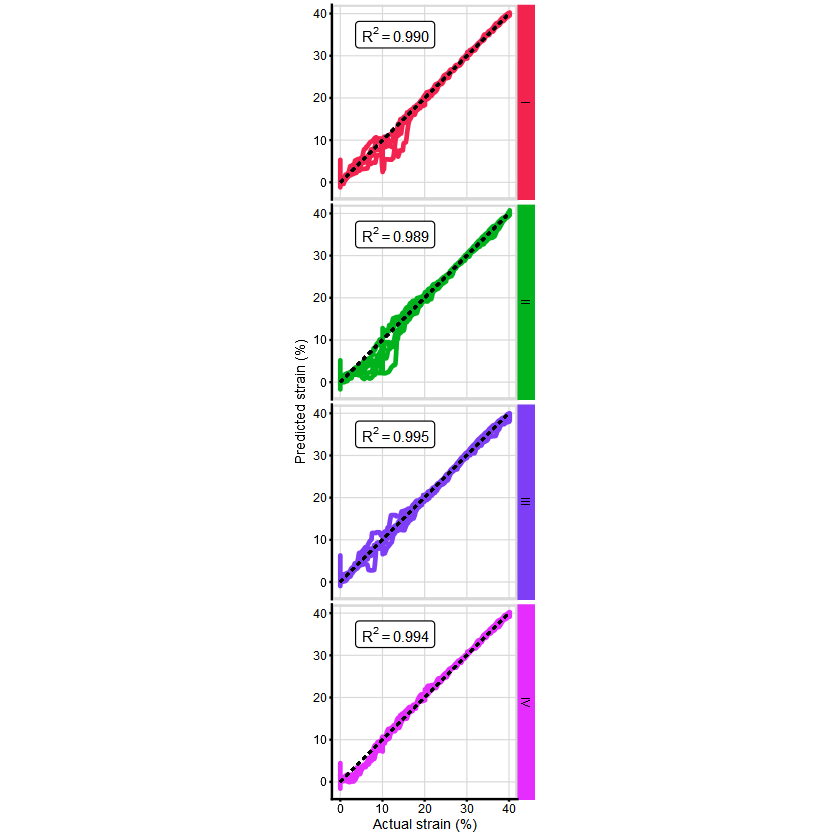

In [6]:
r2_values <- c(0.9895, 0.9892, 0.9945, 0.9942)
r2_label_a <- paste("R^2 == ", sprintf("'%.3f'", r2_values[1])) #round(r2_values[1],3))
r2_label_b <- paste("R^2 == ", sprintf("'%.3f'", r2_values[2])) 
r2_label_c <- paste("R^2 == ", sprintf("'%.3f'", r2_values[3])) 
r2_label_d <- paste("R^2 == ", sprintf("'%.3f'", r2_values[4])) 
r2_dict <- data.frame(sensor=c('A', 'B', 'C', 'D'), r2=c(r2_label_a, r2_label_b, r2_label_c, r2_label_d))

plt5 <- ggplot(data=df_long, aes(x=strain_actual, y=strain_pred, colour=sensor, group=sensor))
plt5 <- plt5 + scale_colour_manual(values=colour_list, guide="none")
plt5 <- plt5 + geom_path(linewidth=1)
plt5 <- plt5 + geom_segment(aes(x=0, y=0, xend=0.4, yend=0.4), linewidth=0.5, linetype='dashed', colour='black')
#plt5 <- plt5 + annotate("text", x=0.125, y=0.35, colour="black", size=3, label=r2_label_a, parse=TRUE)
plt5 <- plt5 + geom_label(data=r2_dict, aes(label=r2, group=sensor), x=0.13, y=0.35, size=3, colour='black', parse=TRUE)
plt5 <- plt5 + scale_x_continuous(labels=function(x)x*100)
plt5 <- plt5 + scale_y_continuous(labels=function(x)x*100)
plt5 <- plt5 + ylab(expression("Predicted strain (%)"))
plt5 <- plt5 + xlab(expression("Actual strain (%)"))                               
plt5 <- plt5 + theme_cowplot(6) + theme(plot.margin = unit(c(0.1, 0.25, 0.1, 0), "cm"), text=element_text(size=8), axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7))
plt5 <- plt5 + coord_equal(xlim=c(0,0.4),ylim=c(-0.02,0.4))       
plt5 <- plt5 + panel_border() + background_grid(major="xy", size.major=0.25)
plt5 <- plt5 + facet_grid2(vars(sensor), strip=strip, labeller=sensor_labeller)
print(plt5)

## Import Schematic Legend Graphic

This image shows graphically the series of straining tests done. It will become the upper part of Figure 6.

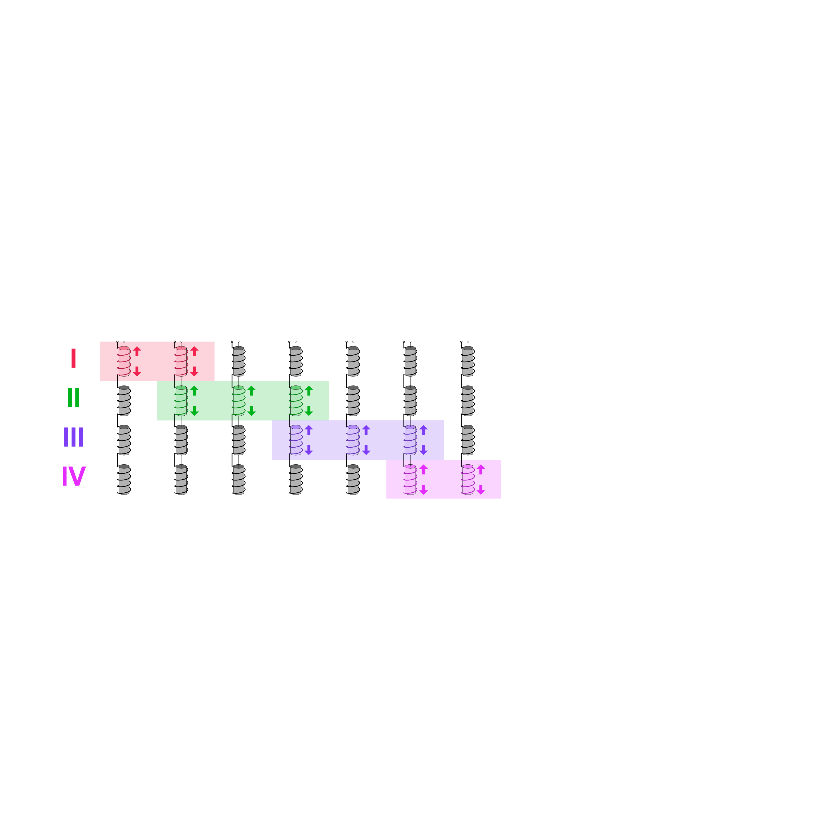

In [7]:
graphical_description <- "./Legend.png"
graphical_description <- ggdraw() + draw_image(graphical_description, scale=1)
graphical_description

## Compile Figure

Combine the plots and save as PNG, EPS.

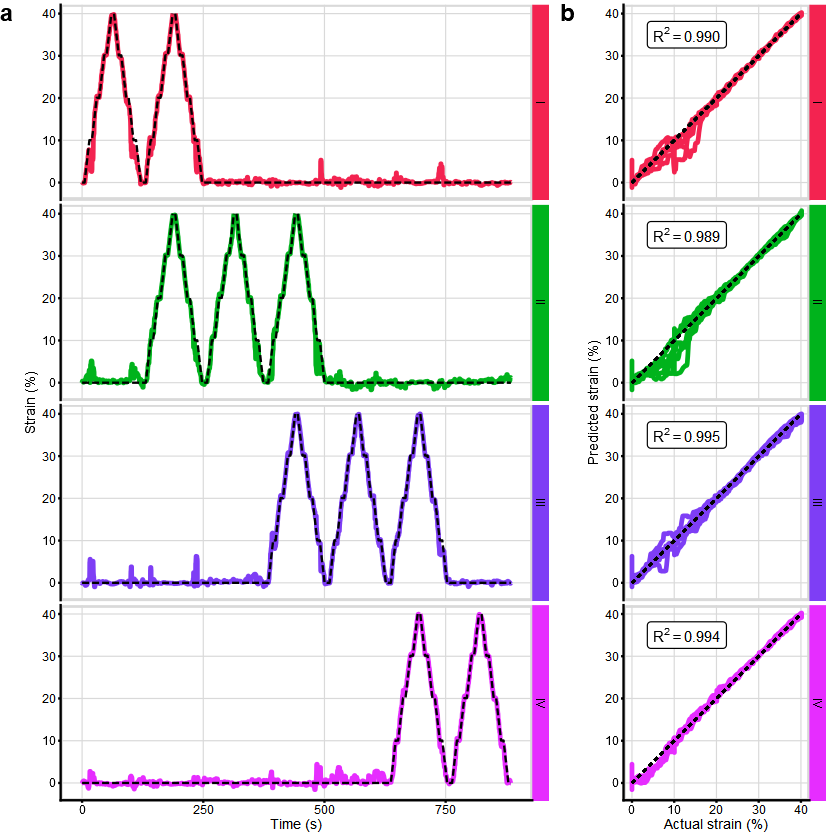

In [10]:
plots <- plot_grid(plt1, plt5, labels=c('a', 'b'), axis='l', hjust=-0.01, vjust=1.25, align='hv', ncol=2, rel_widths=c(3, 1.5), byrow=FALSE)
print(plots)

In [11]:
ggsave("Fig6.png", device='png', dpi=600, width=88.9, height=80, units="mm", scale=1.5, bg="white")
ggsave("Fig6.eps", device=cairo_ps, fallback_resolution=600, width=88.9, height=80, units="mm", scale=1.5, bg="white")